# Ozone formation in an urban plume
The formation of ozone in an urban plume is demonstrated using a simple photochemical box model with a minimum number of species and reactions. In the following, the terms VOC (volatile organic compounds) and ROG (reactive organic gases) will be used as synonyms.

The following assumptions are made:
* An air mass travels on a sunny summer day at constant speed of 5 m/s across a 10 km wide city.
* The air mass represents a well mixed planetary boundary layer of constant depth.
* Before reaching the city, the air mass is rather clean with low initial NO$_x$, VOC and O$_3$ concentrations.
* Over the city, NO$_x$ and VOCs are emitted at constant rates.
* The NO:NO$_2$ ratio in the emissions is assumed to be 10:1.
* Once leaving the city, emissions stop and NO$_x$ and VOCs start being consumed by reactions with OH. At the same time, O$_3$ is formed through a coupled NO$_x$ - HO$_x$ reaction cycle.
* The net O$_3$ formation in the plume is analyzed by comparing the O$_3$ concentration 80 km downwind of the city to the inital $O_3$ concentration.

The following chemical reactions are considered:

<ol>
  <li>ROG + OH -> HO$_2$, $k_1$
  <li>HO$_2$ + NO -> OH + NO$_2$, $k_2$
  <li>NO + O$_3$ -> NO$_2$ + O$_2$, $k_3$
  <li>NO$_2$ + O$_2$ -> NO + O$_3$, $k_4$
  <li>NO$_2$ + OH -> HNO$_3$, $k_5$
  <li>O$_3$ + H$_2$O -> O$_2$ + 2 OH, $k_6$
  <li>2 HO$_2$ -> O$_2$ + H$_2$O$_2$, $k_7$
  <li>O$_3$ + HO$_2$ -> OH + 2 O$_2$, $k_8$
  <li>OH + HO$_2$ -> H$_2$O + O$_2$, $k_9$
</ol>

The system of coupled differential equations is integrated with a QSSA (Quasi-steady-state approximation) solver as follows:

<img src="qssa.png" width=600 align="center">

with P$_x$ denoting all source terms of species X and D$_x$ all loss terms.

The model was originally written in Fortran by Joachim Orb (ETH), then ported to php by Jörg Mäder (ETH), and finally to python by Dominik Brunner (Empa).

In the form below you may play with the inital concentrations, the emission rates and the temperature. 
After changing a value, press **"Shift-Enter"** to execute.

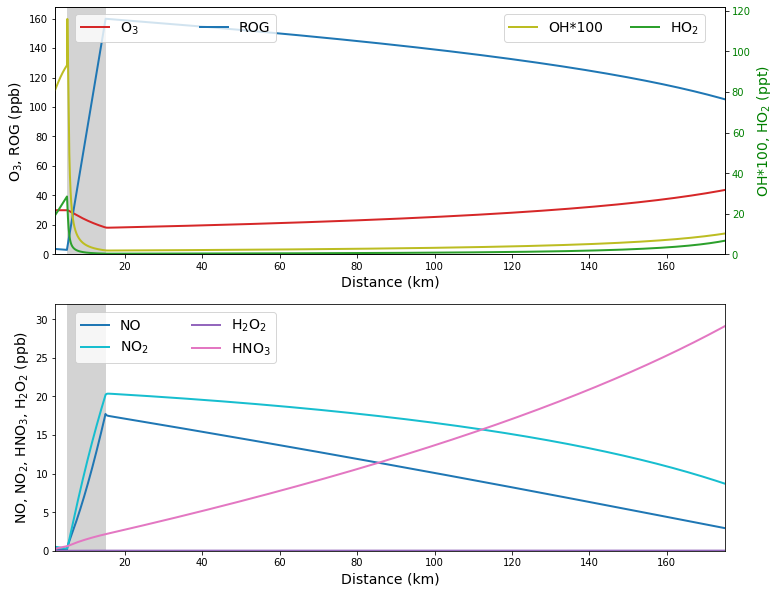

                 O3      NO     NO2     ROG    HNO3    H2O2     HO2      OH
Min (ppb):   18.054   0.121   0.305   3.013   0.000   0.000   0.000   0.000
Max (ppb):   46.287  17.730  20.356 159.896  30.484   0.026   0.028   0.001


In [2]:
from urban_o3_plume import urban_plume

# emissions strengths of NOx and ROGs
SNOx=0.02
SROG=0.08
# initial concentrations
CNOx=1.0
CO3=30.0
CROG=4.0
# temperature (K)
T=303.15

urban_plume(SNOx=SNOx,SROG=SROG,CNOx=CNOx,CROG=CROG,CO3=CO3,
                T=T,doPlot=True,savePlot=False,saveCSV=False,
                showHOx=True)

To store the output as csv-file or as png-image, run with savePlot=True or saveCSV=True. You will then find a file "plume.csv" or "plume.png" in the tab in your webbrowser, from where you started the jupyter notebook, e.g. 
https://hub.mybinder.org/user/gredvis-tropchem-xxxxxxxx/notebooks/urban-plume-notebook/
where xxxxxxxx has to be replaced by the appropriate characters of your web address. You can then download the file to your local computer. The csv-file can be opened with Excel.

You can also just run the box model (without generating a figure) and return the "plume" as a python dictionary. The example below shows how you can then display the maximum O3 value in the plume.

In [5]:
from urban_o3_plume import simple_boxmodel

# emissions strengths of NOx and ROGs
SNOx=0.01
SROG=0.08
# initial concentrations
CNOx=1.0
CO3=30.0
CROG=4.0
# temperature (K)
T=303.15

plume = simple_boxmodel(SNOx=SNOx,SROG=SROG,CNOx=CNOx,CROG=CROG,
                            CO3=CO3,T=T)

# get and print maximum O3 concentration in the plume
o3max = max(plume['conc']['O3'])
print(o3max)

82.0028178486571


With a little bit of python knowledge, you could now write a routine looping over different NOx and ROG source strengths and storing the max. O3 concentrations for each run in an array. In order not to loose your code, you should copy it to an external text file once you are happy with it.